<a href="https://colab.research.google.com/github/Boso123/MLcourseFatiga/blob/master/Serialize_data_from_server.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install Pillow

In [0]:
!pip install request

  Created wheel for request: filename=request-2019.4.13-cp36-none-any.whl size=1677 sha256=28fc972656d163fcd98fde915cf27ab1b5dd79f3eb7da32a7ca4bbc2eb7b3ef3
  Stored in directory: /root/.cache/pip/wheels/30/84/5f/484cfba678967ef58c16fce6890925d5c7172622f20111fbfd
  Created wheel for get: filename=get-2019.4.13-cp36-none-any.whl size=1692 sha256=ca7a0bc32575660fd3edbac19f4cac6dc3b64393d33b791ea6f2d80eeecfe744
  Stored in directory: /root/.cache/pip/wheels/c1/e3/c1/d02c8c58538853e4c9b78cadb74f6d5c5c370b48a69a7271aa
  Created wheel for post: filename=post-2019.4.13-cp36-none-any.whl size=1661 sha256=3a9a09a98a392c6d0e4426e7f8d3474d33408aabe15aff19686532b9587f58c1
  Stored in directory: /root/.cache/pip/wheels/c3/c3/24/b5c132b537ab380c02d69e6bd4dec1f5db56b5fe19030473d7
  Created wheel for query-string: filename=query_string-2019.4.13-cp36-none-any.whl size=2049 sha256=f03f356845fa4b08899327276fad5266202d7d381a117ea8f0c58a555737942b
  Stored in directory: /root/.cache/pip/wheels/d6/a4/78/01b

In [0]:
import requests
from PIL import Image
import base64
from io import BytesIO
from matplotlib.pyplot import imshow
import numpy as np
import csv

In [0]:
image_index_global = 0
def serialize_photo(image_data, image_index=0, save=False):
    pil_image = Image.open(BytesIO(base64.b64decode(image_data)))
    if (save):
      pil_image.save("/content/drive/My Drive/MicrosuenosData/images/image{}.jpg".format(image_index))
      image_index = image_index + 1
      return image_index
    else:
      imshow(np.asarray(pil_image))

In [0]:
writer = None
with open('/content/drive/My Drive/MicrosuenosData/data.csv', 'w+', newline='') as file:
  writer = csv.writer(file)
  writer.writerow(["id", "image", "time", "initial_time", "pitch", "yaw", "roll", "pitchs", "yawns", "tag"])

def write_in_file(writer, information):
  with open('/content/drive/My Drive/MicrosuenosData/data.csv', 'a+', newline='') as file:
    writer = csv.writer(file)
    writer.writerow([information[0], information[1], information[2], information[3], information[4], information[5], information[6], information[7], information[8], information[9]])


Se testea el metodo para transformar las imagenes

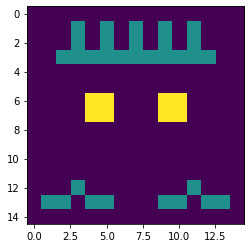

In [0]:
serialize_photo("R0lGODlhDwAPAKECAAAAzMzM/////wAAACwAAAAADwAPAAACIISPeQHsrZ5ModrLlN48CXF8m2iQ3YmmKqVlRtW4MLwWACH+H09wdGltaXplZCBieSBVbGVhZCBTbWFydFNhdmVyIQAAOw==")

Se realiza la petición de todos los datos para la board de renault

In [0]:
def getData(url):
  r = requests.get(url)
  return r

2019-07-21T23:31:23.068000
{'image': '', 'timestamp': '2019-07-21T23:31:23.712000', 'image_path': '/home/ec2-user/microservice/media/8846120ebf85586dac421a24998a3d78/2019-07-21/1.jpg', 'pitch': -0.8231576430587992, 'yaw': -2.2517736713823435, 'roll': -3.2977915275863476, 'pitchs': 0, 'yawns': 0}
http://35.173.191.17:8000/multiinputdata/board/?id_board=RenaultData&page=2

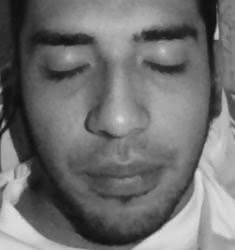

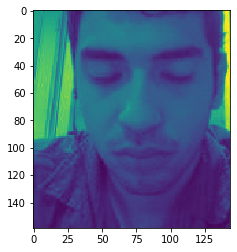

In [0]:
url = "http://35.173.191.17:8000/multiinputdata/board/"
board = "RenaultData"
PARAMS = {'id_board': board} 
r = requests.get(url,params=PARAMS)
response = r.json()
next = response["next"]
image_base64 = response["results"][1]["list_inputdata"][0]["image"]
image_base64 = image_base64[len("data:image/jpeg;base64,"):]
serialize_photo(image_base64)
print(response["results"][0]["start_timestamp"])
print(response["results"][0]["list_inputdata"][0])
print(next)

Write the image in a google drive folder and the metada in a csv file

In [0]:
while (next != None):
  for register in response["results"]:
    initial_time = register["start_timestamp"]
    label = ""
    if (register["label"]["is_asleep"]):
      label = "dormido"
    elif (register["label"]["is_distraction"]):
      label = "distraido"

    for list_data in register["list_inputdata"]:
      image = list_data["image"][len("data:image/jpeg;base64,"):]
      image_index_global = serialize_photo(image, image_index_global,save=True)
      data = [image_index_global, "/images/image{}.jpg".format(image_index_global), list_data["timestamp"], initial_time, list_data["pitch"], list_data["yaw"], list_data["roll"], list_data["pitchs"], list_data["yawns"], label]
      write_in_file(writer, data)
  request = getData(next)
  r_json = request.json()
  next = r_json["next"]
  response = r_json
  print(next)

print("All done...")
print("Files writer in the google drive folder")

http://35.173.191.17:8000/multiinputdata/board/?id_board=RenaultData&page=3
http://35.173.191.17:8000/multiinputdata/board/?id_board=RenaultData&page=4
http://35.173.191.17:8000/multiinputdata/board/?id_board=RenaultData&page=5
http://35.173.191.17:8000/multiinputdata/board/?id_board=RenaultData&page=6
http://35.173.191.17:8000/multiinputdata/board/?id_board=RenaultData&page=7
http://35.173.191.17:8000/multiinputdata/board/?id_board=RenaultData&page=8
http://35.173.191.17:8000/multiinputdata/board/?id_board=RenaultData&page=9
http://35.173.191.17:8000/multiinputdata/board/?id_board=RenaultData&page=10
http://35.173.191.17:8000/multiinputdata/board/?id_board=RenaultData&page=11
http://35.173.191.17:8000/multiinputdata/board/?id_board=RenaultData&page=12
http://35.173.191.17:8000/multiinputdata/board/?id_board=RenaultData&page=13
http://35.173.191.17:8000/multiinputdata/board/?id_board=RenaultData&page=14
http://35.173.191.17:8000/multiinputdata/board/?id_board=RenaultData&page=15
http:/